<a href="https://colab.research.google.com/github/AchmadFauzan312/postest2-datamining/blob/main/Achmad_Fauzan_SI_C2_117_PostTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# data in the form of transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

print("\nTABULASI")
df = pd.DataFrame(data)
df = pd.get_dummies(df.stack()).sum(level=0)
print(df)


TABULASI
    beef  butter  butter milk  canned beer  cling film/bags  curd  \
0      0       0            0            0                0     0   
1      0       0            0            0                0     0   
2      0       0            0            0                0     0   
3      0       0            0            1                0     0   
4      0       0            0            0                0     0   
5      0       0            0            0                0     0   
6      0       0            0            0                0     0   
7      0       0            0            0                0     0   
8      0       0            0            0                0     1   
9      1       0            0            0                0     0   
10     0       1            0            0                0     0   
11     0       0            0            0                0     0   
12     0       0            0            0                0     0   
13     0       0        

<ipython-input-2-643e8049610b>:25: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df = pd.get_dummies(df.stack()).sum(level=0)


##Daftar Support dan Confident



In [3]:
# data in the form of transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

# convert data to one-hot encoding format
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# find frequently occurring itemsets (support) with Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# find association rules with Association Rule Mining algorithm
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# create table of support for itemsets
df_support = frequent_itemsets
df_support['support'] = df_support['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_support = df_support.rename(columns={"itemsets": "itemset"})
df_support = df_support.set_index('itemset')
print(df_support)

# create table of support and confidence for rules
df_rules = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# filter rules with only one antecedent and one consequent
df_rules = df_rules[df_rules['antecedents'].apply(lambda x: len(x) == 1) & df_rules['consequents'].apply(lambda x: len(x) == 1)]

# format antecedent and consequent columns
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: list(x)[0])
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: list(x)[0])

# set antecedent as index and sort by confidence
df_rules = df_rules.set_index('antecedents')
df_rules = df_rules.sort_values(by=['confidence'], ascending=False)

# create table of support and confidence for filtered rules
df_rules = df_rules[['consequents', 'support', 'confidence']]
df_rules['support'] = df_rules['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_rules['confidence'] = df_rules['confidence'].apply(lambda x: "{:.2f}%".format(x*100))
print("\n")
print("HASIL SUPPORT DAN CONFIDENCE")
print("\n")

print(df_rules)


                                                   support
itemset                                                   
(beef)                                               5.26%
(butter)                                             5.26%
(butter milk)                                        5.26%
(canned beer)                                        5.26%
(cling film/bags)                                    5.26%
...                                                    ...
(semi-finished bread, sausage, whole milk)           5.26%
(semi-finished bread, yogurt, sausage)               5.26%
(yogurt, sausage, whole milk)                        5.26%
(semi-finished bread, yogurt, whole milk)            5.26%
(semi-finished bread, yogurt, sausage, whole milk)   5.26%

[65 rows x 1 columns]


HASIL SUPPORT DAN CONFIDENCE


                             consequents support confidence
antecedents                                                
beef                         white bread   5.26%    100.0

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

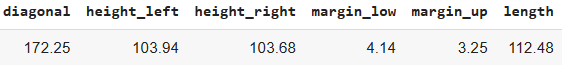
<!-- 1412 -->

In [5]:
import pandas as pd
import math

# Membuat data frame
df = pd.read_csv('deteksi_uang_palsu.csv')

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print(df)




   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length       jarak  
0  113.02  162.985541  
1  113.74  163.637621  
2  113.12  163.039278  
3  113.30  163.154696  
4  113.46  163.132317  
5  110.9

In [6]:
import pandas as pd
import math

# load data
df = pd.read_csv("deteksi_uang_palsu.csv")

# hitung jarak dari setiap data terhadap target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
jarak = []
for i in range(len(df)):
    d = 0
    for j in range(1, 7):
        d += (df.iloc[i, j] - target[j-1])**2
    jarak.append(math.sqrt(d))
df['jarak'] = jarak

# urutkan data berdasarkan jarak terdekat
K = int(math.sqrt(len(df)))
df_sorted = df.sort_values(by='jarak').head(K)

# tampilkan data terurut
print(df_sorted)


# Menghitung jumlah nilai True dan False untuk K terdekat
num_true = len(df_sorted[df_sorted["is_genuine"] == True])
num_false = len(df_sorted[df_sorted["is_genuine"] == False])
print("\n")
print("Jumlah True: ", num_true)
print("Jumlah False: ", num_false)


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


Jumlah True:  3
Jumlah False:  0


In [7]:
# mengambil data terdekat dengan target
data = pd.read_csv("deteksi_uang_palsu.csv")

test_data = pd.DataFrame({
    'is_genuine': [True],
    'diagonal': [172.20],
    'height_left': [104.12],
    'height_right': [103.64],
    'margin_low': [4.38],
    'margin_up': [3.00],
    'length': [113.18]
})

# menghitung jarak
distances = pd.DataFrame()
distances['distance'] = ((data.iloc[:,1:] - test_data.iloc[:,1:])**2).sum(axis=1)**0.5

# menambahkan kolom jarak ke data
data['distance'] = distances['distance']

# mengurutkan data berdasarkan jarak terdekat
k = int(math.sqrt(len(data)))
sorted_data = data.sort_values(by='distance').head(k)

# melakukan klasifikasi berdasarkan mayoritas kelas
pred_label = sorted_data['is_genuine'].value_counts().idxmax()

# menampilkan hasil prediksi
print("Hasil prediksi: ", pred_label)


Hasil prediksi:  True


# (3) Analisis

#Data Understanding

In [8]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

##colect intial data

In [12]:
df = pd.read_csv("COVID-19 Survey Student Responses.csv")
df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


In [13]:
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [14]:
df.tail()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college
1181,R1195,Delhi-NCR,13,5.0,Good,Tablet,2.0,0.5,7.0,1.0,Whatsapp,1,3,Remain Constant,NO,Talking,YES,YES,School/college


In [15]:
# df1 isinya dataset dengan label target Delhi-NCR
df1 = df[df['Region of residence'] == 'Delhi-NCR']

# Menampilkan hasil filter
print(df1)

         ID Region of residence  Age of Subject  Time spent on Online Class  \
0        R1           Delhi-NCR              21                         2.0   
1        R2           Delhi-NCR              21                         0.0   
2        R3           Delhi-NCR              20                         7.0   
3        R4           Delhi-NCR              20                         3.0   
4        R5           Delhi-NCR              21                         3.0   
...     ...                 ...             ...                         ...   
1177  R1191           Delhi-NCR              12                         3.0   
1178  R1192           Delhi-NCR              14                         6.0   
1179  R1193           Delhi-NCR              13                         4.0   
1180  R1194           Delhi-NCR              14                         5.0   
1181  R1195           Delhi-NCR              13                         5.0   

     Rating of Online Class experience Medium for o

In [16]:
# df1 isinya dataset dengan label target Delhi-NCR
df1 = df[df['Region of residence'] != 'Delhi-NCR']

# Menampilkan hasil filter
print(df1)

         ID Region of residence  Age of Subject  Time spent on Online Class  \
7        R8   Outside Delhi-NCR              19                         2.0   
9       R10   Outside Delhi-NCR              20                         0.0   
13      R14   Outside Delhi-NCR              22                         1.0   
16      R17   Outside Delhi-NCR              20                         0.0   
35      R36   Outside Delhi-NCR              21                         6.0   
...     ...                 ...             ...                         ...   
1145  R1157   Outside Delhi-NCR              13                         6.0   
1146  R1158   Outside Delhi-NCR              11                         5.0   
1148  R1160   Outside Delhi-NCR              14                         5.0   
1154  R1167   Outside Delhi-NCR              14                         6.0   
1170  R1184   Outside Delhi-NCR              13                         5.0   

     Rating of Online Class experience Medium for o

##describe data

In [18]:
# df3 isinya dataset dengan label target Revital
df3 = df[df['Medium for online class'] == 'Laptop/Desktop']

# Menampilkan hasil filter
print(df3)

         ID Region of residence  Age of Subject  Time spent on Online Class  \
0        R1           Delhi-NCR              21                         2.0   
2        R3           Delhi-NCR              20                         7.0   
4        R5           Delhi-NCR              21                         3.0   
8        R9           Delhi-NCR              21                         3.0   
9       R10   Outside Delhi-NCR              20                         0.0   
...     ...                 ...             ...                         ...   
1169  R1183           Delhi-NCR              16                         7.5   
1170  R1184   Outside Delhi-NCR              13                         5.0   
1173  R1187           Delhi-NCR              12                         6.0   
1174  R1188           Delhi-NCR              13                         8.0   
1180  R1194           Delhi-NCR              14                         5.0   

     Rating of Online Class experience Medium for o

In [19]:
# df4 isinya dataset dengan label target Age of Subject di bawah 20
df4 = df[df['Age of Subject'] < 20]

# Menampilkan hasil filter
print(df4)

         ID Region of residence  Age of Subject  Time spent on Online Class  \
6        R7           Delhi-NCR              19                         2.0   
7        R8   Outside Delhi-NCR              19                         2.0   
30      R31           Delhi-NCR              19                         4.0   
36      R37           Delhi-NCR              17                         4.0   
44      R45           Delhi-NCR              18                         2.0   
...     ...                 ...             ...                         ...   
1177  R1191           Delhi-NCR              12                         3.0   
1178  R1192           Delhi-NCR              14                         6.0   
1179  R1193           Delhi-NCR              13                         4.0   
1180  R1194           Delhi-NCR              14                         5.0   
1181  R1195           Delhi-NCR              13                         5.0   

     Rating of Online Class experience Medium for o

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

In [21]:
df.select_dtypes(include=np.number)

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day
0,21,2.0,4.0,0.0,7.0,3.0,4
1,21,0.0,0.0,2.0,10.0,3.0,3
2,20,7.0,3.0,0.0,6.0,2.0,3
3,20,3.0,2.0,1.0,6.0,5.0,3
4,21,3.0,3.0,1.0,8.0,3.0,4
...,...,...,...,...,...,...,...
1177,12,3.0,4.0,1.0,8.0,1.0,3
1178,14,6.0,4.0,1.0,9.0,1.0,4
1179,13,4.0,0.0,0.5,8.0,3.0,4
1180,14,5.0,3.5,1.0,8.0,0.5,4


In [22]:
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())
  print("Nilai standar deviasi :", dfnum.std())
  print("Nilai mean            :", dfnum.mean())

In [23]:
tampil("Age of Subject")

Nilai minimum         : 7
Nilai maksimum        : 59
Nilai standar deviasi : 5.516467469270775
Nilai mean            : 20.165820642978005


In [24]:
tampil("Time spent on Online Class")

Nilai minimum         : 0.0
Nilai maksimum        : 10.0
Nilai standar deviasi : 2.1017562738007336
Nilai mean            : 3.208840947546532


In [25]:
tampil("Time spent on self study")

Nilai minimum         : 0.0
Nilai maksimum        : 18.0
Nilai standar deviasi : 2.140590185422091
Nilai mean            : 2.911590524534687


##Explore Data

##Visualisasi Comparison

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

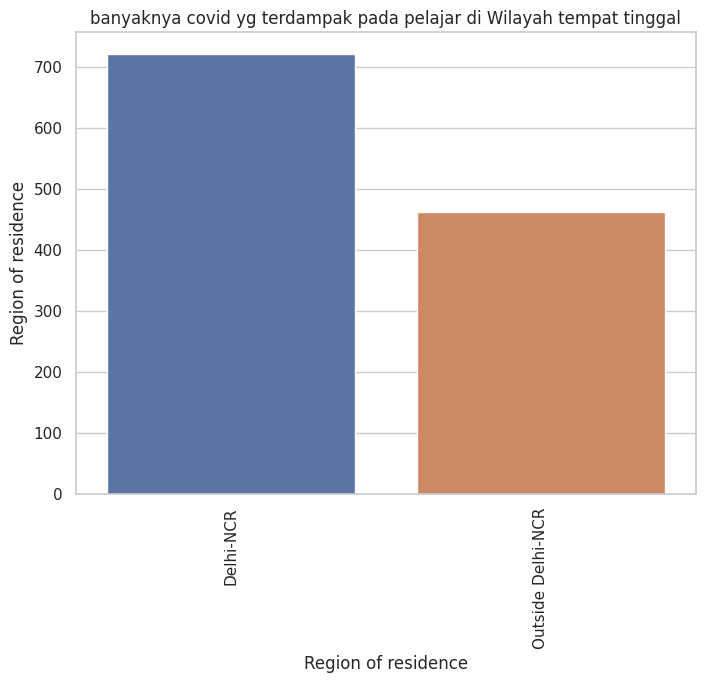

In [27]:
country_count = Counter(df['Region of residence'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('banyaknya covid yg terdampak pada pelajar di Wilayah tempat tinggal')
plt.xlabel('Region of residence')
plt.ylabel('Region of residence')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

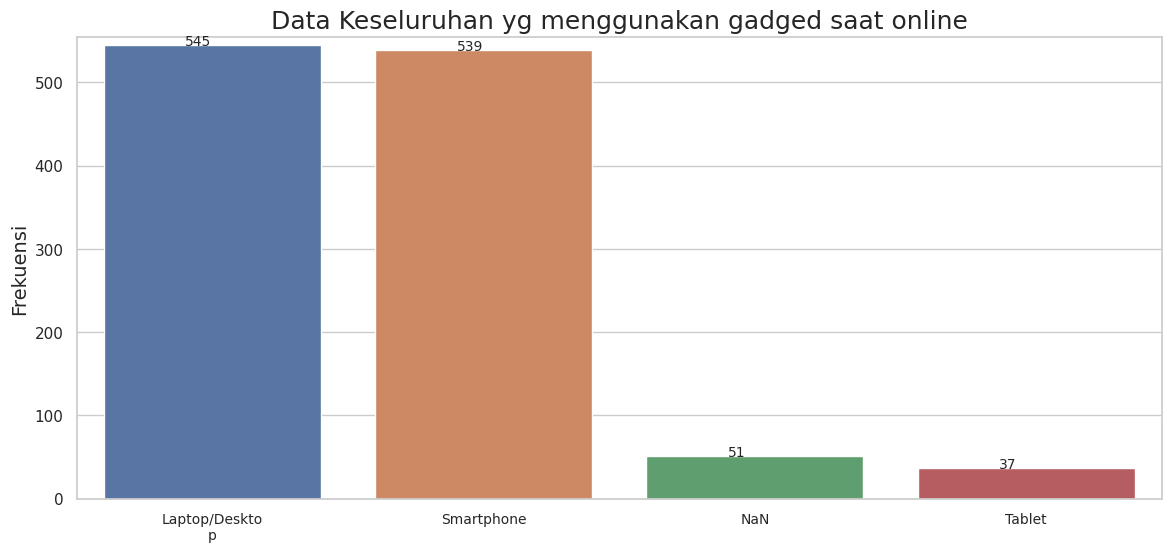

In [30]:
fig, ax = plt.subplots(figsize = (14, 6))
max_width = 13

index = df['Medium for online class'].fillna('NaN').value_counts().index[0:4]
count = df['Medium for online class'].fillna('NaN').value_counts()[0:4]
sns.barplot(x = index, y = count, order = index)
ax.set_title('Data Keseluruhan yg menggunakan gadged saat online', fontsize = 18)
ax.set_xticklabels((textwrap.fill(x, max_width) for x in index), fontsize = 10)
for i, count in enumerate(count):
    ax.text(x=i-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Frekuensi', fontsize = 14)
ax.set_ylim(0, df['Medium for online class'].fillna('NaN').value_counts()[0]+10)

plt.show()

##Visualisasi Distribution

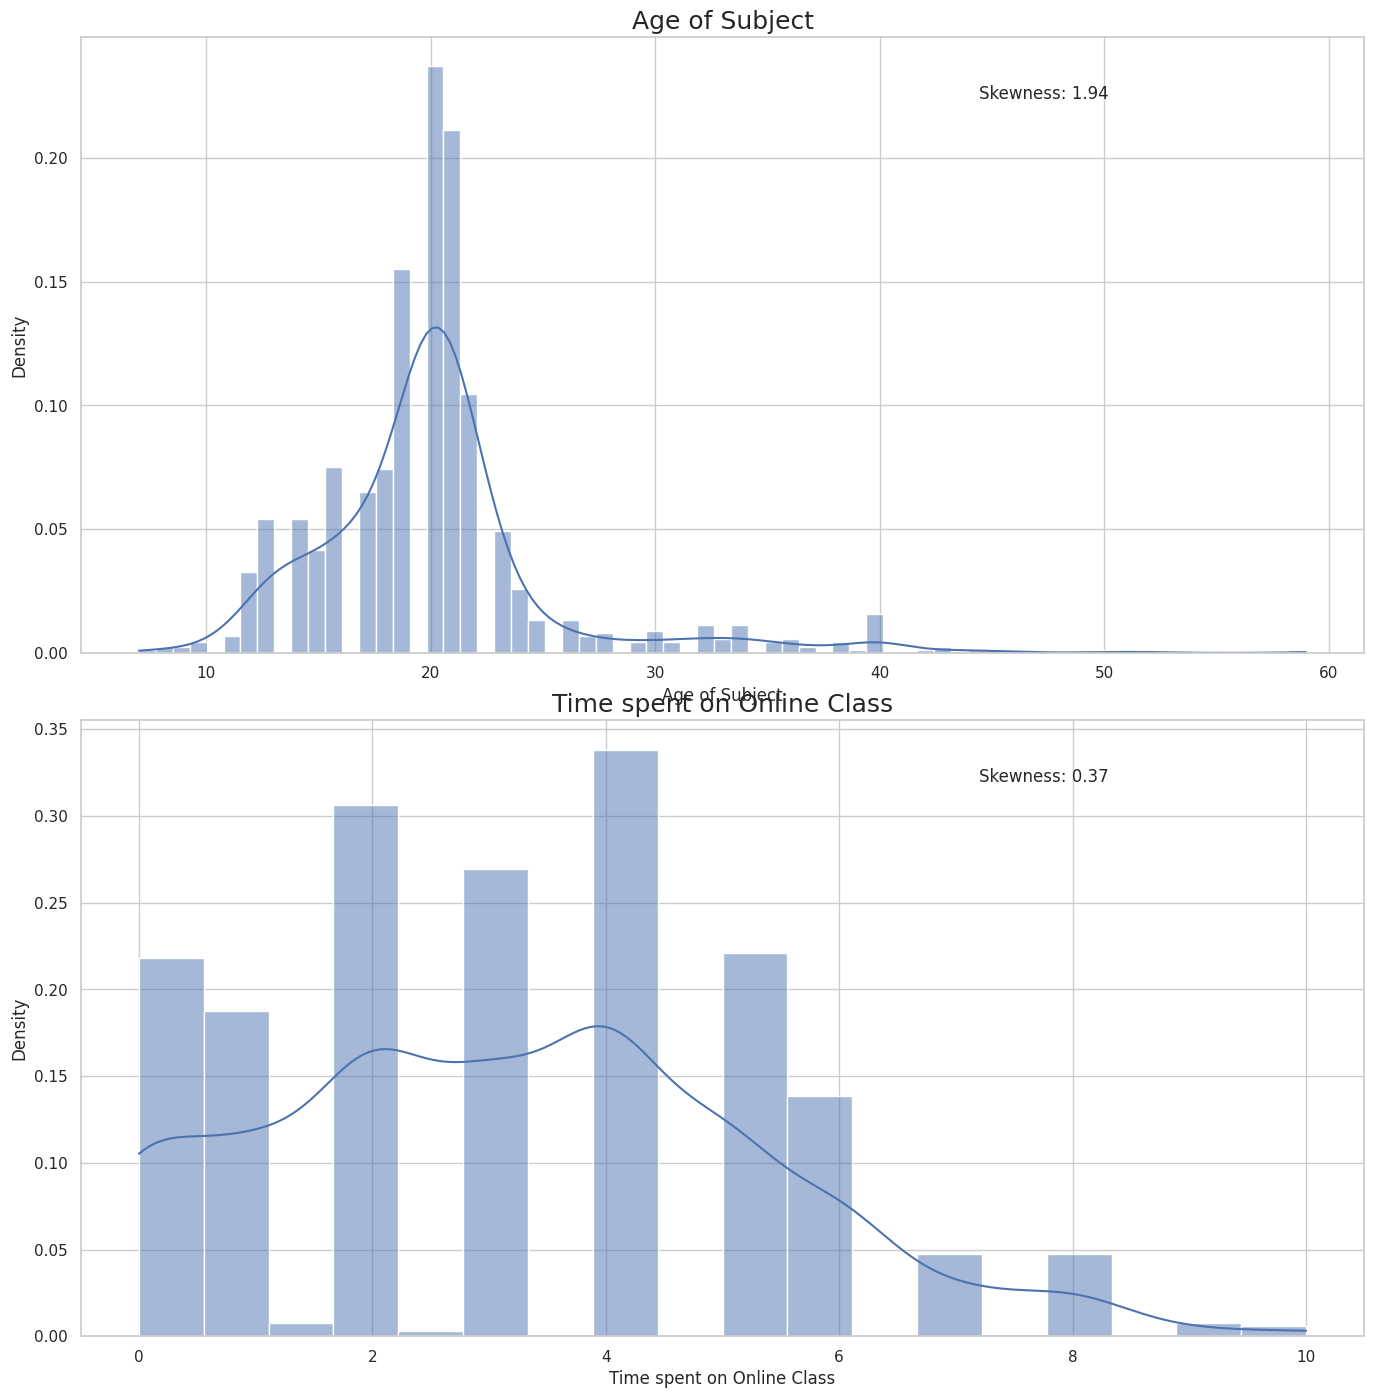

In [32]:
# Mendefinisikan Kolom pada list dari dataset
num_cols = ['Age of Subject', 'Time spent on Online Class']

# Membuat diagram
fig, ax = plt.subplots(2, figsize=(14, 14))
fig.tight_layout(pad=2)

for ax, col in zip(ax.flatten(), num_cols):
    sns.histplot(ax=ax, data=df, x=col, kde=True, stat='density')
    ax.set_title(col, fontsize=18)
    ax.annotate(f"Skewness: {df[col].skew():.2f}", xy=(0.7, 0.9), xycoords='axes fraction')

plt.show()

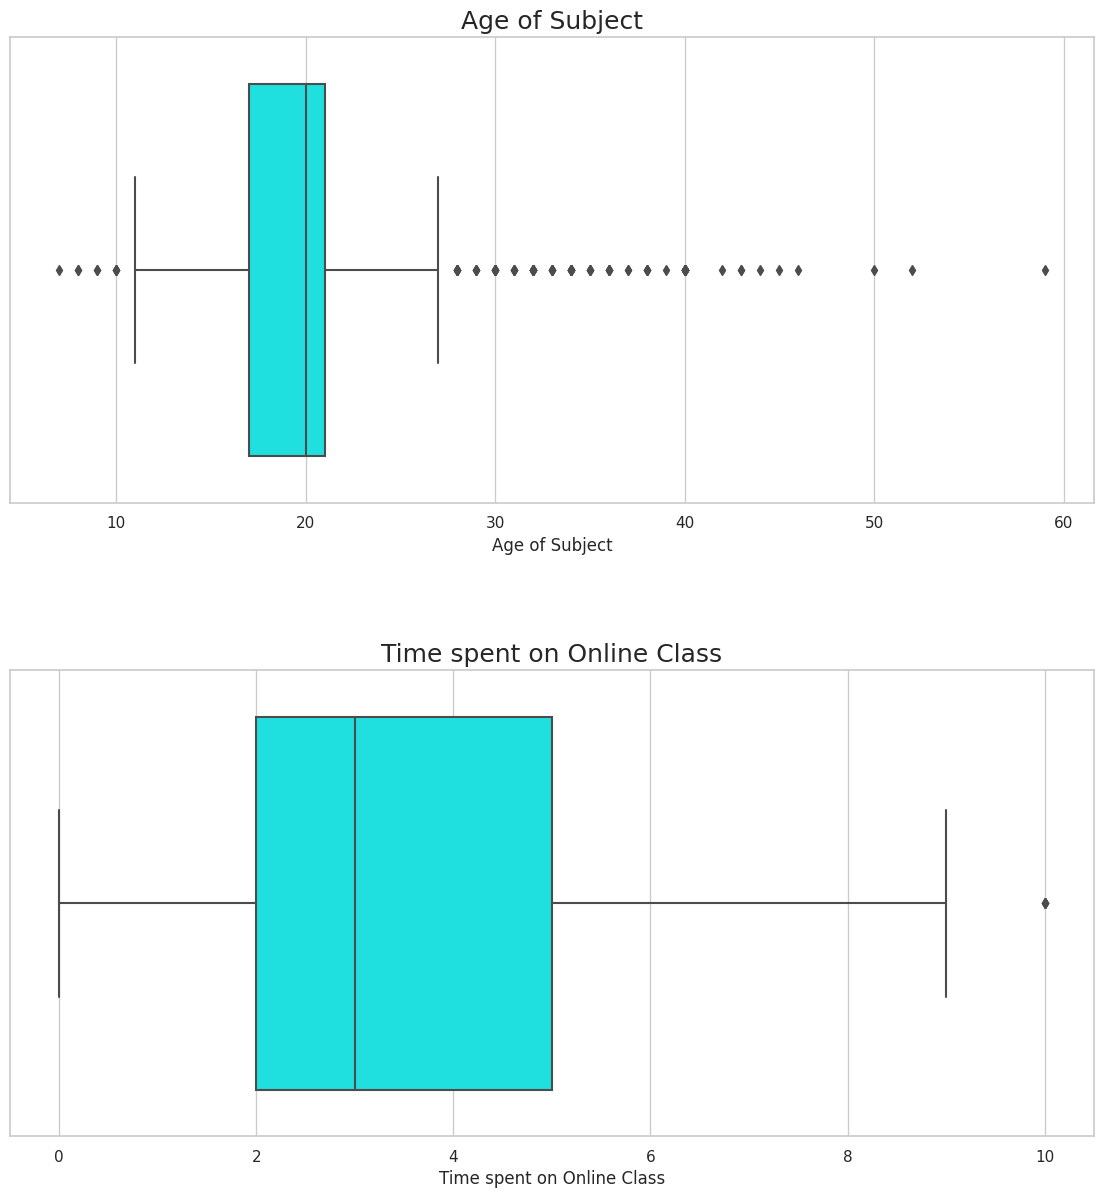

In [33]:
num_cols = ['Age of Subject', 'Time spent on Online Class']

fig, ax = plt.subplots(len(num_cols), 1, figsize = (14, 14))
fig.tight_layout(pad = 8)

for i, col in enumerate(num_cols):
    sns.boxplot(ax = ax[i], x = df[col], orient = 'h', color = 'aqua')
    ax[i].set_title(col, fontsize = 18)

plt.show()

##Visualisasi Relationship

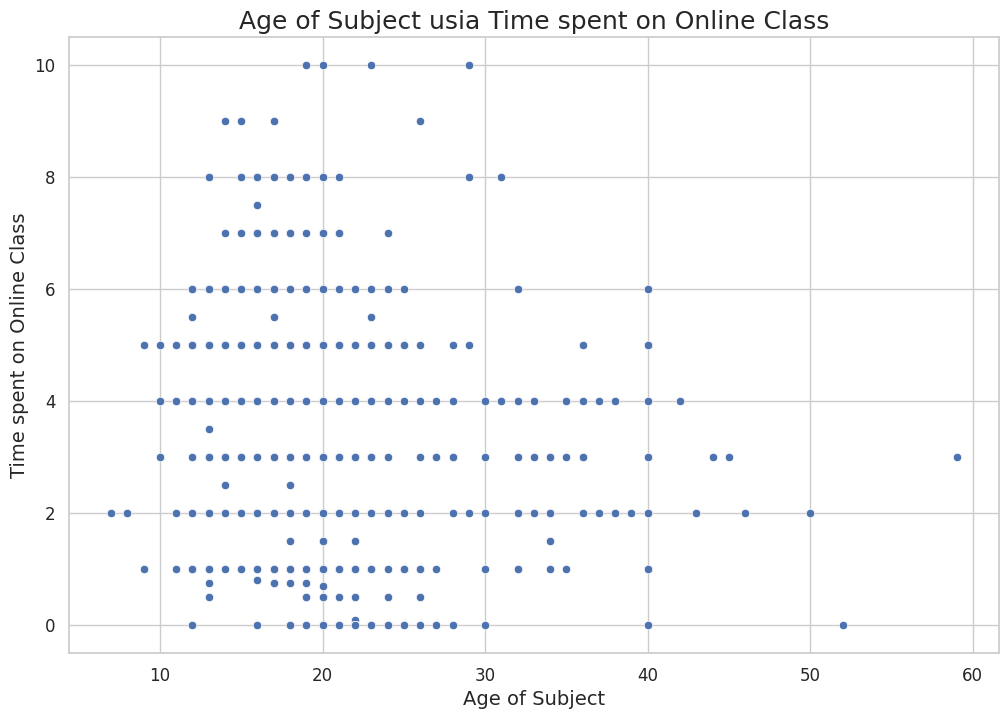

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x="Age of Subject", y="Time spent on Online Class")
ax.set_title('Age of Subject usia Time spent on Online Class', fontsize=18)
ax.set_xlabel('Age of Subject', fontsize=14)
ax.set_ylabel('Time spent on Online Class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##Visualisasi Composition

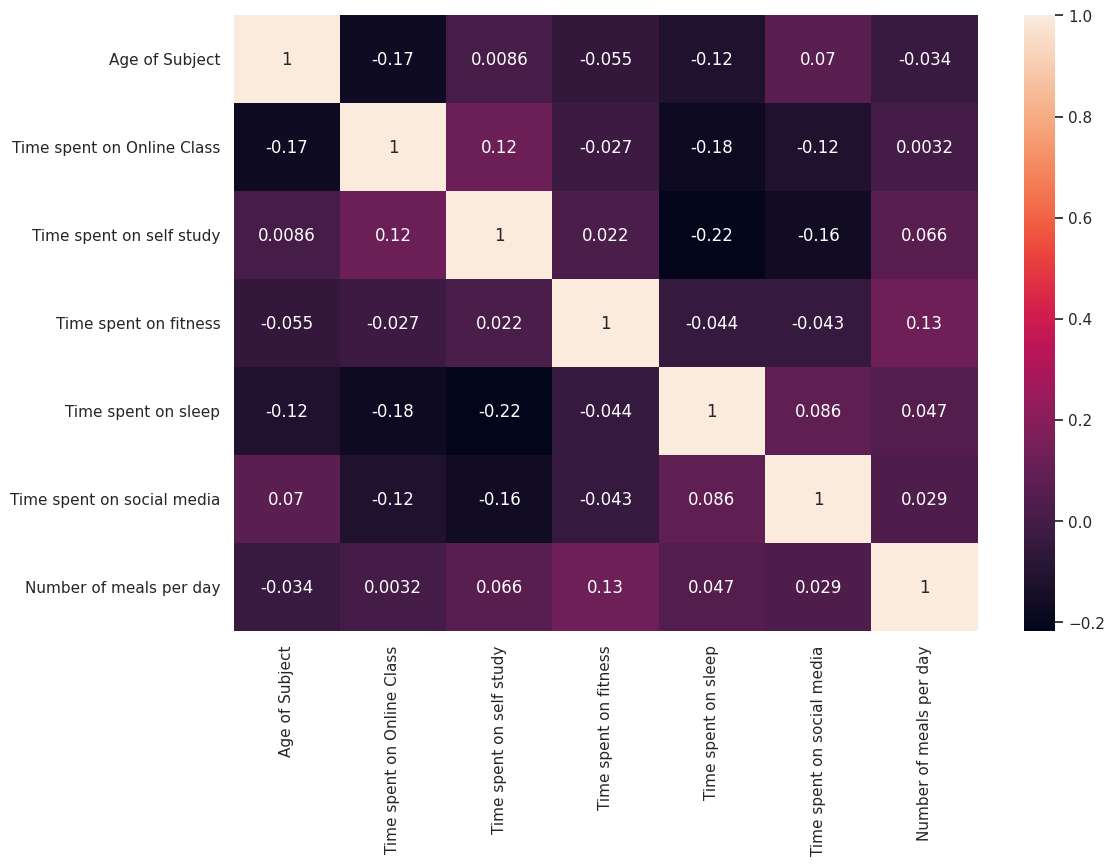

In [37]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat.columns, rotation = 0)
plt.show()

##verify data quality

In [38]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     24
Medium for online class                                                               51
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                         0
Time

In [39]:
# Check for duplicates
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [40]:
# Check for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 Age of Subject                                                                        96
Change in your weight                                                                  0
Do you find yourself more connected with your family, close friends , relatives  ?     0
Health issue during lockdown                                                           0
ID                                                                                     0
Medium for online class                                                                0
Number of meals per day                                                               15
Prefered social media platform                                                         0
Rating of Online Class experience                                                      0
Region of residence                                                                    0
Stress busters                                                                         0
Time spent

<ipython-input-40-650d731e3b3f>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


In [41]:
# Check data types
print("Data types:\n", df.dtypes)

Data types:
 ID                                                                                     object
Region of residence                                                                    object
Age of Subject                                                                          int64
Time spent on Online Class                                                            float64
Rating of Online Class experience                                                      object
Medium for online class                                                                object
Time spent on self study                                                              float64
Time spent on fitness                                                                 float64
Time spent on sleep                                                                   float64
Time spent on social media                                                            float64
Prefered social media platform                 

#Data Preparation

##select data

In [42]:
import pandas as pd
df = pd.read_csv("COVID-19 Survey Student Responses.csv")

In [43]:
# Membuat hanya menampikan 2 Kolom
selected_data = df[["Region of residence", "Medium for online class"]]

# Menampilkan Perintah
print(selected_data.head())

  Region of residence Medium for online class
0           Delhi-NCR          Laptop/Desktop
1           Delhi-NCR              Smartphone
2           Delhi-NCR          Laptop/Desktop
3           Delhi-NCR              Smartphone
4           Delhi-NCR          Laptop/Desktop


In [44]:
# Membuat hanya menampikan 3 Kolom
selected_data = df[["Region of residence", "Age of Subject", "Medium for online class"]]

# Menampilkan Perintah
print(selected_data.head())

  Region of residence  Age of Subject Medium for online class
0           Delhi-NCR              21          Laptop/Desktop
1           Delhi-NCR              21              Smartphone
2           Delhi-NCR              20          Laptop/Desktop
3           Delhi-NCR              20              Smartphone
4           Delhi-NCR              21          Laptop/Desktop


##clean data

In [45]:
df.isna().sum()

ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     24
Medium for online class                                                               51
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                         0
Time spent on TV     

In [46]:
df.isna().sum() / len(df) * 100

ID                                                                                    0.000000
Region of residence                                                                   0.000000
Age of Subject                                                                        0.000000
Time spent on Online Class                                                            0.000000
Rating of Online Class experience                                                     2.030457
Medium for online class                                                               4.314721
Time spent on self study                                                              0.000000
Time spent on fitness                                                                 0.000000
Time spent on sleep                                                                   0.000000
Time spent on social media                                                            0.000000
Prefered social media platform                    

In [48]:
df["Medium for online class"] = df["Medium for online class"].fillna(df["Medium for online class"].mode()[0])
df["Time spent on self study"] = df["Time spent on self study"].fillna(df["Time spent on self study"].mode()[0])

In [49]:
df.isna().sum()

ID                                                                                     0
Region of residence                                                                    0
Age of Subject                                                                         0
Time spent on Online Class                                                             0
Rating of Online Class experience                                                     24
Medium for online class                                                                0
Time spent on self study                                                               0
Time spent on fitness                                                                  0
Time spent on sleep                                                                    0
Time spent on social media                                                             0
Prefered social media platform                                                         0
Time spent on TV     

In [50]:
df.isna().sum() / len(df) * 100

ID                                                                                    0.000000
Region of residence                                                                   0.000000
Age of Subject                                                                        0.000000
Time spent on Online Class                                                            0.000000
Rating of Online Class experience                                                     2.030457
Medium for online class                                                               0.000000
Time spent on self study                                                              0.000000
Time spent on fitness                                                                 0.000000
Time spent on sleep                                                                   0.000000
Time spent on social media                                                            0.000000
Prefered social media platform                    

##construct data

In [51]:
import pandas as pd

df = pd.read_csv("COVID-19 Survey Student Responses.csv")

In [52]:
# Create a new feature that calculates the difference between the maximum and minimum values of each banknote
df["prediksi"] = df["Age of Subject"] + df["Time spent on Online Class"]

# Display the first few rows of the modified dataset
print(df.head())

   ID Region of residence  Age of Subject  Time spent on Online Class  \
0  R1           Delhi-NCR              21                         2.0   
1  R2           Delhi-NCR              21                         0.0   
2  R3           Delhi-NCR              20                         7.0   
3  R4           Delhi-NCR              20                         3.0   
4  R5           Delhi-NCR              21                         3.0   

  Rating of Online Class experience Medium for online class  \
0                              Good          Laptop/Desktop   
1                         Excellent              Smartphone   
2                         Very poor          Laptop/Desktop   
3                         Very poor              Smartphone   
4                              Good          Laptop/Desktop   

   Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                       4.0                    0.0                  7.0   
1                       0.0     

In [53]:
import pandas as pd


# Membaca dataset kesehatan
df = pd.read_csv("COVID-19 Survey Student Responses.csv")

# Menambahkan kolom
df['keseharian isolasi'] = df['Time spent on self study'] / ((df['Time spent on fitness'] / 100) ** 2)


# Menghapus kolom-kolom yang tidak diperlukan
df = df.drop(['Time spent on TV', 'Number of meals per day', 'Change in your weight'], axis=1)

# Menampilkan lima baris pertama dari dataset yang telah diproses
print(df.head())

   ID Region of residence  Age of Subject  Time spent on Online Class  \
0  R1           Delhi-NCR              21                         2.0   
1  R2           Delhi-NCR              21                         0.0   
2  R3           Delhi-NCR              20                         7.0   
3  R4           Delhi-NCR              20                         3.0   
4  R5           Delhi-NCR              21                         3.0   

  Rating of Online Class experience Medium for online class  \
0                              Good          Laptop/Desktop   
1                         Excellent              Smartphone   
2                         Very poor          Laptop/Desktop   
3                         Very poor              Smartphone   
4                              Good          Laptop/Desktop   

   Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                       4.0                    0.0                  7.0   
1                       0.0     

##integrate data

In [55]:
df = pd.read_csv('COVID-19 Survey Student Responses.csv')

# Melakukan integrasi data dengan menambahkan kolom baru
df['kelas online'] = df['Time spent on Online Class'] + df['Age of Subject']

# Melakukan perubahan pada nilai data tertentu
df.loc[df['Time spent on self study'] == 'nilai_awal', 'Time spent on sleep'] = 'nilai_baru'

# Melakukan penghapusan kolom yang tidak diperlukan
df = df.drop(['Prefered social media platform', 'Time spent on TV'], axis=1)

# Menyimpan dataset yang telah diubah
df.to_csv('integrity data.csv', index=False)

print("berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu kelas online")

berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu kelas online


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 18 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

##format data

In [58]:
# Membaca file csv
df = pd.read_csv('COVID-19 Survey Student Responses.csv')

# Menghapus kolom yang tidak diperlukan
df = df.drop(['Stress busters', 'Time utilized'], axis=1)

# Mengganti nilai null dengan nilai rata-rata
mean_value = df['Number of meals per day'].mean()
df['Number of meals per day'] = df['Number of meals per day'].fillna(mean_value)

# Mengubah tipe data review count dari string ke integer
df['Number of meals per day'] = df['Number of meals per day'].astype(int)

# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Mengurutkan data berdasarkan kolom5
df = df.sort_values('Change in your weight')

# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)

In [59]:
df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
590,R597,Delhi-NCR,24,6.0,Good,Laptop/Desktop,8.0,0.0,9.0,2.0,Youtube,0,3,Decreased,YES,YES,Colleagues
816,R825,Outside Delhi-NCR,22,2.0,Average,Laptop/Desktop,7.0,1.0,9.0,2.0,Instagram,0,2,Decreased,NO,NO,Roaming around freely
812,R821,Outside Delhi-NCR,40,1.0,Average,Smartphone,1.0,1.0,8.0,3.0,Facebook,2,2,Decreased,NO,YES,School/college
222,R224,Delhi-NCR,23,1.0,Very poor,Smartphone,8.0,2.0,8.0,2.0,Instagram,2,3,Decreased,NO,YES,"Friends , relatives"
225,R227,Outside Delhi-NCR,19,2.0,Very poor,Smartphone,2.0,1.0,8.0,2.0,Whatsapp,1,3,Decreased,YES,YES,Roaming around freely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,R754,Delhi-NCR,19,3.0,Very poor,Smartphone,2.0,1.0,9.0,5.0,Instagram,1,3,Remain Constant,NO,NO,"Friends , relatives"
746,R755,Outside Delhi-NCR,23,3.0,Good,Laptop/Desktop,5.0,0.0,6.0,1.0,Youtube,0,2,Remain Constant,NO,YES,School/college
747,R756,Outside Delhi-NCR,20,4.0,Average,Smartphone,2.0,0.0,8.0,2.0,Whatsapp,4,3,Remain Constant,NO,YES,"Friends , relatives"
264,R267,Outside Delhi-NCR,16,6.0,Good,Laptop/Desktop,3.0,0.0,7.0,1.0,Whatsapp,1,3,Remain Constant,NO,NO,School/college


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 590 to 1181
Data columns (total 17 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-nu